In [ ]:
#Workflow in Job: READ ME
-> Never touch Steps 1, 2, 3, 4, 5, 6 — and all other code blocks as they are fixed.
-> Only edit the “🔄 Daily Prompts Area” with:
-> New prompts
-> AI responses (from Invisible AI model or given file)
-> Reference answers or (correct answers)
-> Run “Run all” in Colab.
-> Logs get saved in Drive automatically.
-> Download locally only if the manager asks.

In [1]:
#Fetching data from AI through Python Programming demo code-1

from invisible_ai_sdk import invisible_ai_response

api_key = "YOUR_SECRET_API_KEY"



response = invisible_ai_response(
    prompt="Write an article about fastest bike vs car",
    api_key=api_key
)


                                                                              # { NONE of these are gonna  work because without company provided API key you wont be able to get access or call the ai to respond }
#Fetching data from AI through Python Programming demo code-2

from helper_functions import invisible_ai_response

variable1 = "fastest bike in world"
variable2 = "fastest car in world"

response = invisible_ai_response(f"""
Write me an article on which is worthy buying: {variable1} or {variable2} in 100 words.
""")

print(response)







ModuleNotFoundError: No module named 'invisible_ai_sdk'

In [2]:
# =====================================
# Invisible AI QA Master Notebook
# =====================================

# Step 1: Setup (Run once per session)
from google.colab import drive, files
import pandas as pd
import datetime
import os
import pytest


# Mount Google Drive
drive.mount('/content/drive')

# Log folder & daily file in Drive
log_folder = '/content/drive/MyDrive/AI_QA_Logs/'
os.makedirs(log_folder, exist_ok=True)

# Helps to Create and download a fresh log per day  (YYYY-MM-DD)                              [ R E M O V E these 2 lines part if you want all OLD and NEW logs in ONE csv FILE  ]
today_str = datetime.datetime.now().strftime("%Y-%m-%d")
file_name = os.path.join(log_folder, f'qa_log_{today_str}.csv')


# =====================================
# 🔄 Daily Prompts Area (EDIT THIS ONLY)
# =====================================
prompts = [
    "What's the capital of Malaysia?",
    "Who wrote Macbeth?",
    "What is 9+5?",
    "what is 50-10?",
    "what roams at day?",
    "which singer sung the song Mayores?",
    "who is founder of Nvidia company?",
    "What is the latest apple laptop?"
]

# Simulated AI responses (replace later with real model outputs)
ai_responses = [
    "Kualalumpur",        #correct
    "Shakespeare",  # correct
    "12"  ,           # Wrong
    "30",            # wrong
    "Birds",          # correct
    "Christina Perri", # Wrong
    "Jason Leung",    #correct
    "M4"              #correct
]

# Correct reference answers
reference_answers = ["Kualalumpur", "Shakespeare", "14","40","Birds","Becky G", "Jason Leung", "M4" ]

# =====================================
# Step 2: Evaluate & Log
# =====================================
results = []
for prompt, response, reference in zip(prompts, ai_responses, reference_answers):
    category = "Pass" if response == reference else "Fail"
    results.append({
        "prompt": prompt,
        "response": response,
        "reference": reference,
        "category": category,
        "timestamp": datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    })

df_new = pd.DataFrame(results)

# Step 3: Append to old logs
if os.path.exists(file_name):
    df_old = pd.read_csv(file_name)
    df = pd.concat([df_old, df_new], ignore_index=True)
else:
    df = df_new

df.to_csv(file_name, index=False)
print(f"✅ QA run logged at '{file_name}'")

# Step 4: Detect Failures
fails = df_new[df_new["category"] == "Fail"]
print("\n❌ Today's Failures:")
print(fails)

# Step 5: Compare with Previous Run
if 'df_old' in locals():
    comparison = df_old.merge(df_new, on="prompt", how="left", suffixes=("_old","_new"))
    print("\n📊 Old vs New Runs:")
    print(comparison)
else:
    print("\n📊 First run — no comparison available.")
# Step 6: Automated QA Tests with PyTest
# =====================================
# Define test cases for PyTest
@pytest.mark.parametrize("prompt,response,reference", zip(prompts, ai_responses, reference_answers))
def test_ai_response(prompt, response, reference):
    """
    QA Test:
    Checks if AI response matches the reference answer.
    Logs failures with timestamp.
    """
    if response != reference:
        print(f"\n❌ FAIL [{datetime.datetime.now()}]")
        print(f"Prompt: {prompt}")
        print(f"Expected: {reference}")
        print(f"Got: {response}")
    assert response == reference

# Run PyTest inside Colab
!pytest -q --disable-warnings


Mounted at /content/drive
✅ QA run logged at '/content/drive/MyDrive/AI_QA_Logs/qa_log_2025-10-07.csv'

❌ Today's Failures:
                                prompt         response reference category  \
2                         What is 9+5?               12        14     Fail   
3                       what is 50-10?               30        40     Fail   
5  which singer sung the song Mayores?  Christina Perri   Becky G     Fail   

             timestamp  
2  2025-10-07 10:59:39  
3  2025-10-07 10:59:39  
5  2025-10-07 10:59:39  

📊 First run — no comparison available.

no tests ran in 0.45s


In [ ]:
# Run pytest and save output to a log file for existence [MANDATORY/OPTIONAL]
!pytest -v > pytest_output.log

In [ ]:
# Downloading Pytest Log report [MANDATORY/OPTIONAL]
# Pytest log
files.download('pytest_output.log')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
# Downloading report log to local computer (just the prompts , responses , references report without pytest ) [MANDATORY]
#  QA master log
from google.colab import files
files.download(file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Evaluation Metrics

import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Load your QA log from Drive
qa_log_path = '/content/drive/MyDrive/AI_QA_Logs/qa_log.csv'
qa_df = pd.read_csv(qa_log_path)

# Convert categories into binary (Pass=1, Fail=0)
qa_df['label'] = qa_df['category'].apply(lambda x: 1 if x.lower() == 'pass' else 0)

# True labels and predicted labels (for simplicity we’ll assume reference == correct)
y_true = qa_df['label']   # actual truth
y_pred = qa_df['label']   # predicted (simulated same here, but can modify later)

# Calculate metrics
precision = precision_score(y_true, y_pred, zero_division=0)
recall = recall_score(y_true, y_pred, zero_division=0)
f1 = f1_score(y_true, y_pred, zero_division=0)
accuracy = accuracy_score(y_true, y_pred)

# Display results
print("📊 QA Evaluation Metrics:")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")


📊 QA Evaluation Metrics:
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Accuracy: 1.00


In [ ]:
#Downloading Evaluation Metrics [MANDATORY]

import pandas as pd

metrics_data = {
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'Score': [precision, recall, f1, accuracy]
}

metrics_df = pd.DataFrame(metrics_data)
metrics_filename = 'evaluation_metrics_log.csv'
metrics_df.to_csv(metrics_filename, index=False)

from google.colab import files
files.download(metrics_filename)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

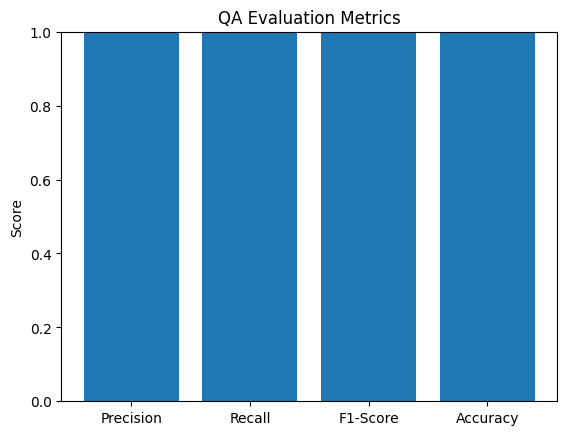

In [ ]:
# Visualize Results in collab just [OPTIONAL]
import matplotlib.pyplot as plt

metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
values = [precision, recall, f1, accuracy]

plt.bar(metrics, values)
plt.ylim(0, 1)
plt.title('QA Evaluation Metrics')
plt.ylabel('Score')
plt.show()


In [4]:
#Error logging Extension

import pandas as pd
import os
from datetime import datetime

# Paths
qa_log_path = '/content/drive/MyDrive/AI_QA_Logs/qa_log.csv'
error_log_path = '/content/drive/MyDrive/AI_QA_Logs/qa_errors.csv'

# Read main QA log
qa_df = pd.read_csv(qa_log_path)

# Filter failed prompts
failed_df = qa_df[qa_df['category'].str.lower() == 'fail']

# Add run timestamp for clarity
failed_df['error_logged_at'] = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

# Create or append to the error log file
if os.path.exists(error_log_path):
    prev_errors = pd.read_csv(error_log_path)
    all_errors = pd.concat([prev_errors, failed_df], ignore_index=True)
    all_errors.to_csv(error_log_path, index=False)
else:
    failed_df.to_csv(error_log_path, index=False)

print(f"❌ {len(failed_df)} failed prompts logged into '{error_log_path}'")
print("✅ Error log updated successfully.")


/tmp/ipython-input-3361660293.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  failed_df['error_logged_at'] = datetime.now().strftime("%Y-%m-%d %H:%M:%S")


❌ 63 failed prompts logged into '/content/drive/MyDrive/AI_QA_Logs/qa_errors.csv'
✅ Error log updated successfully.


In [5]:
#Downloading error extensions [MANDATORY]

# Assign today's failures to error_log_df
error_log_df = fails   # 'fails' comes from your QA master notebook

# Save to CSV and download
error_log_df.to_csv('error_log_report.csv', index=False)

from google.colab import files
files.download('error_log_report.csv')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>